In [ ]:
#take a look at the kind of GPU we have
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Segmentation-of-Teeth-in-Panoramic-X-ray-Image-Using-U-Net-master")

In [ ]:
%cd /content/drive/MyDrive/Segmentation-of-Teeth-in-Panoramic-X-ray-Image-Using-U-Net-master

/content/drive/MyDrive/Segmentation-of-Teeth-in-Panoramic-X-ray-Image-Using-U-Net-master


In [ ]:
from download_dataset import *
import os
path = "Data"
if os.path.exists(path+'/DentalPanoramicXrays.zip') == False:
  os.mkdir(path)
  download_dataset(path+'/')

In [ ]:
from images_prepare import *
#pre_images(resize_shape,path,include_zip)
X,X_sizes=pre_images((512,512),path,True)

In [7]:
from masks_prepare import *
#Y=pre_masks(resize_shape=(512,512),path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Original_Masks')  ORIGINALL MASKS function
Y=pre_splitted_masks(path='Custom_Masks') #Custom Splitted MASKS size 512x512


In [8]:
X=np.float32(X/255)
Y=np.float32(Y/255)

In [9]:
x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir


  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-s_i2xlxb
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-s_i2xlxb
  Resolved https://github.com/albu/albumentations to commit 4a72cc802e6d78ca036ac089a04fc3d7b573c303
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 267.4 MB/s eta 0:00:00
  Created wheel for albumentations: filename=albumentations-1.4.4-py3-none-any.whl size=152854 sha256=fcf3acd460d9cd7000c84716f4bc3c28788a81c8ce03069c8e65e8907d4e1749
  Stored in directory: /tmp/pip-ephem-wheel-cache-zq62y7xx/wheels/3c/df/16/b3d0d64428c9f25b1ab03989a2e574546d3336647946d31e56
Successfully built albu

In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62 -y

Found existing installation: opencv-python-headless 4.9.0.80
Uninstalling opencv-python-headless-4.9.0.80:
  Successfully uninstalled opencv-python-headless-4.9.0.80


In [ ]:
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 12.8 MB/s eta 0:00:00


In [ ]:
import cv2

import albumentations as A
#Augmention . Change what you want ! Care about Your GPU and CPU RAM

#If you get error : cannot import name '_registerMatType' from 'cv2.cv2' :
#!pip uninstall opencv-python-headless==4.5.5.62
#!pip install opencv-python-headless==4.5.2.52

aug = A.Compose([
    A.OneOf([A.RandomCrop(width=512, height=512),
                 A.PadIfNeeded(min_height=512, min_width=512, p=0.5)],p=0.4),
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25,p=0.5),
    A.Compose([A.RandomScale(scale_limit=(-0.15, 0.15), p=1, interpolation=1),
                            A.PadIfNeeded(512, 512, border_mode=cv2.BORDER_CONSTANT),
                            A.Resize(512, 512, cv2.INTER_NEAREST), ],p=0.5),
    A.ShiftScaleRotate (shift_limit=0.325, scale_limit=0.15, rotate_limit=15,border_mode=cv2.BORDER_CONSTANT, p=1),
    A.Rotate(15,p=0.5),
    A.Blur(blur_limit=1, p=0.5),
    A.Downscale(scale_min=0.15, scale_max=0.25,  always_apply=False, p=0.5),
    A.GaussNoise(var_limit=(0.05, 0.1), mean=0, per_channel=True, always_apply=False, p=0.5),
    A.HorizontalFlip(p=0.25),
])

x_train1=np.copy(x_train)
y_train1=np.copy(y_train)
count=0
while(count<4):
  x_aug2=np.copy(x_train1)
  y_aug2=np.copy(y_train1)
  for i in range(len(x_train1)):
    augmented=aug(image=x_train1[i,:,:,:],mask=y_train1[i,:,:,:])
    x_aug2[i,:,:,:]= augmented['image']
    y_aug2[i,:,:,:]= augmented['mask']
  x_train=np.concatenate((x_train,x_aug2))
  y_train=np.concatenate((y_train,y_aug2))
  if count == 9:
    break
  count += 1

In [ ]:
#For Relase unneccasery memory
del x_aug2
del X
del Y
del y_aug2
del y_train1
del x_train1
del augmented

In [ ]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

65


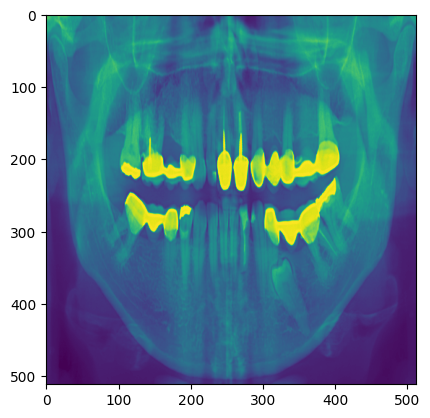

In [ ]:
#Checking data X  and Y matching
plt.imshow(x_train[random_number,:,:,0])

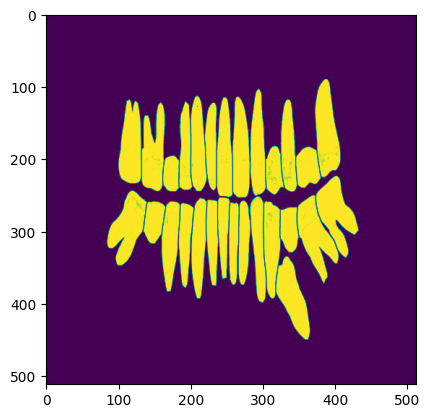

In [ ]:
#Checking data X  and Y matching
plt.imshow(y_train[random_number,:,:,0])

In [ ]:
from model import *
model=UNET(input_shape=(512,512,1),last_activation='sigmoid')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 32)         320       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 512, 512, 32)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 32)         9248      ['dropout[0][0]']             
                                                                                              

In [ ]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Your choice batch and epoch
model.fit(x_train,y_train,batch_size=8,epochs=200,verbose=1)

Epoch 1/200
17/66 [======>.......................] - ETA: 1:22:43 - loss: 0.4415 - accuracy: 0.7594

In [ ]:
model.save('my_model.h5')

In [ ]:
predict_img=model.predict(x_test)
##model.save(path)
predict=predict_img[1,:,:,0]

In [ ]:
#Example Test
from sklearn.metrics import f1_score
import numpy as np
predict_img1=(predict_img>0.25)*1
y_test1=(y_test>0.25)*1

f1_score(predict_img1.flatten(), y_test1.flatten(), average='micro')

In [ ]:

plt.figure(figsize = (5,5))
plt.title("Predict Mask",fontsize = 20)
plt.imshow(predict)
#For CCA, we saved
plt.imsave("/content/predict.png",predict)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example with CCA_Analysis
img=cv2.imread("/content/drive/MyDrive/Segmentation-of-Teeth-in-Panoramic-X-ray-Image-Using-U-Net-master/Data/Images/107.png")

#load image (mask was saved by matplotlib.pyplot)
predicted=cv2.imread("/content/predict.png")

predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

cca_result,teeth_count=CCA_Analysis(img,predicted,3,2)
cv2_imshow(cca_result)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def analyze_tooth_health(tooth_info):

    decay_score = tooth_info.get("decay_score", 0)
    gum_disease_score = tooth_info.get("gum_disease_score", 0)
    # Add more criteria as needed

    # Determine health status based on criteria
    if decay_score > 0 or gum_disease_score > 0:
        health_status = "Bad"
    else:
        health_status = "Good"
    return health_status


tooth_info = {
    "tooth_id": 1,
    "decay_score": 0.2,
    "gum_disease_score": 0.5,
    # Add more features/criteria as needed
}

# Analyze the health of each tooth
tooth_health = analyze_tooth_health(tooth_info)

# Report the health status of each tooth
print(f"Tooth {tooth_info['tooth_id']} health: {tooth_health}")


Tooth 1 health: Bad
